Loading processed TESS data...
TESS data loaded successfully.
X_train_tess shape: (6134, 54)
y_train_tess shape: (6134,)
Class distribution in training data:
tfopwg_disp
PC     3740
FP      954
CP      543
KP      452
APC     367
FA       78
Name: count, dtype: int64

Training Random Forest model with class_weight='balanced' for TESS...
Training complete!
TESS Model saved successfully as 'tess_rf_model.joblib'.

Generating Feature Importances Plot for TESS...


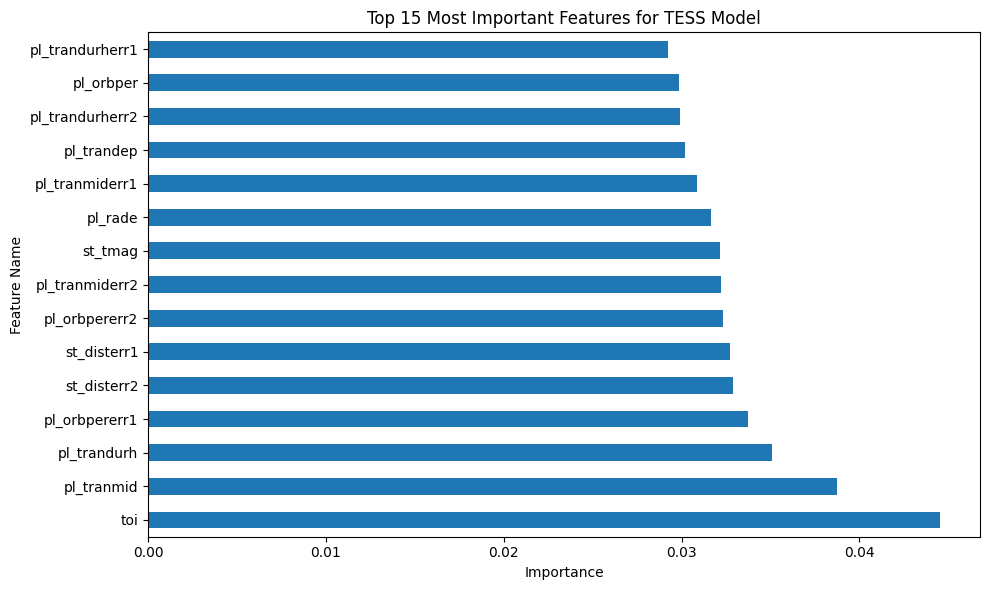


Evaluating TESS model performance on the test set...
Generating TESS Confusion Matrix Plot...


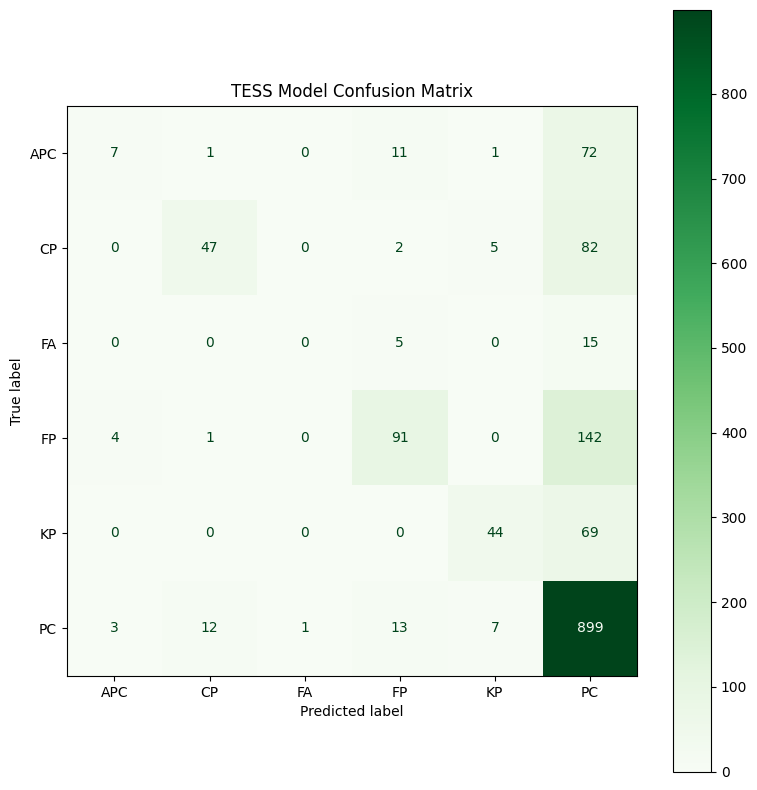


Classification Report for TESS:
              precision    recall  f1-score   support

         APC       0.50      0.08      0.13        92
          CP       0.77      0.35      0.48       136
          FA       0.00      0.00      0.00        20
          FP       0.75      0.38      0.51       238
          KP       0.77      0.39      0.52       113
          PC       0.70      0.96      0.81       935

    accuracy                           0.71      1534
   macro avg       0.58      0.36      0.41      1534
weighted avg       0.70      0.71      0.66      1534



In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import os
import joblib


print("Loading processed TESS data...")
data_path = 'processed_data_clean'
try:
    X_train_tess = pd.read_csv(os.path.join(data_path, 'tess_X_train.csv'))
    y_train_tess = pd.read_csv(os.path.join(data_path, 'tess_y_train.csv')).squeeze()
    X_test_tess = pd.read_csv(os.path.join(data_path, 'tess_X_test.csv'))
    y_test_tess = pd.read_csv(os.path.join(data_path, 'tess_y_test.csv')).squeeze()

    print("TESS data loaded successfully.")
    print(f"X_train_tess shape: {X_train_tess.shape}")
    print(f"y_train_tess shape: {y_train_tess.shape}")
    print("Class distribution in training data:")
    print(y_train_tess.value_counts())
except FileNotFoundError:
    print("Error: TESS files not found. Please ensure they are in the 'processed_data_clean' directory.")
    exit()


print("\nTraining Random Forest model with class_weight='balanced' for TESS...")
tess_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
tess_model.fit(X_train_tess, y_train_tess)
print("Training complete!")


model_file_path = 'tess_rf_model.joblib'
joblib.dump(tess_model, model_file_path)
print(f"TESS Model saved successfully as '{model_file_path}'.")


print("\nGenerating Feature Importances Plot for TESS...")
feature_importances_tess = pd.Series(tess_model.feature_importances_, index=X_train_tess.columns)
top_features_tess = feature_importances_tess.nlargest(15)

plt.figure(figsize=(10, 6))
top_features_tess.plot(kind='barh')
plt.title('Top 15 Most Important Features for TESS Model')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()


print("\nEvaluating TESS model performance on the test set...")
y_pred_tess = tess_model.predict(X_test_tess)
conf_matrix_tess = confusion_matrix(y_test_tess, y_pred_tess)
disp_tess = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_tess, display_labels=tess_model.classes_)

print("Generating TESS Confusion Matrix Plot...")
plt.figure(figsize=(8, 8))
disp_tess.plot(cmap=plt.cm.Greens, values_format='d', ax=plt.gca())
plt.title('TESS Model Confusion Matrix')
plt.tight_layout()
plt.show()


print("\nClassification Report for TESS:")
print(classification_report(y_test_tess, y_pred_tess))

Loading processed TESS data...
TESS data loaded successfully.
X_train_tess shape: (6134, 54)
y_train_tess shape: (6134,)
Class distribution in training data:
tfopwg_disp
PC     3740
FP      954
CP      543
KP      452
APC     367
FA       78
Name: count, dtype: int64

Training XGBoost Classifier for TESS...


c:\Users\Rambod\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:03:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training complete!
TESS Model saved successfully as 'tess_xgb_model.joblib'.

Evaluating XGBoost model performance on the test set...
Generating XGBoost Confusion Matrix Plot...


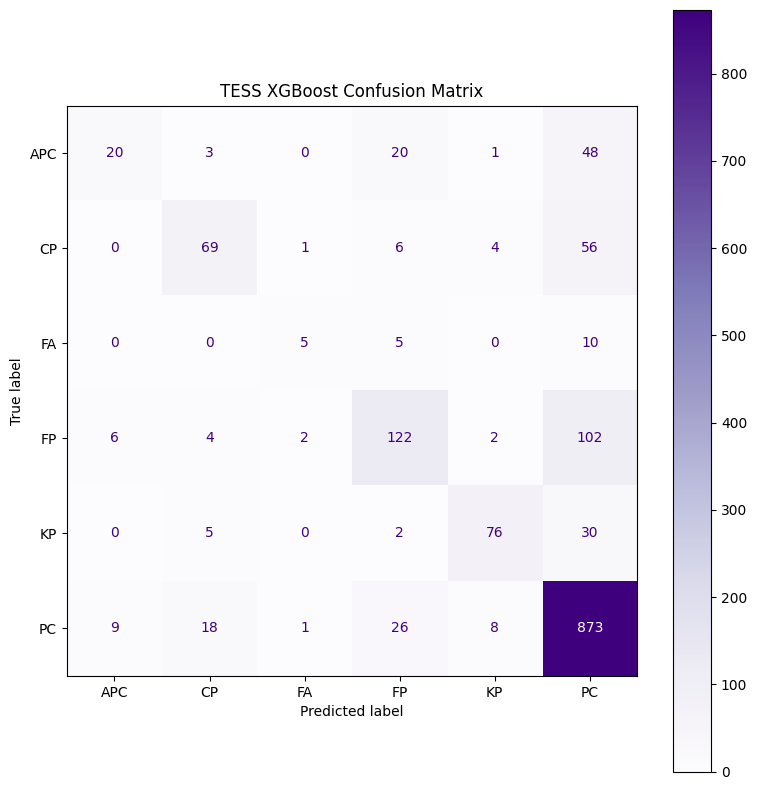


Classification Report for TESS (XGBoost):
              precision    recall  f1-score   support

         APC       0.57      0.22      0.31        92
          CP       0.70      0.51      0.59       136
          FA       0.56      0.25      0.34        20
          FP       0.67      0.51      0.58       238
          KP       0.84      0.67      0.75       113
          PC       0.78      0.93      0.85       935

    accuracy                           0.76      1534
   macro avg       0.69      0.52      0.57      1534
weighted avg       0.74      0.76      0.74      1534



In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import os
import joblib


print("Loading processed TESS data...")
data_path = 'processed_data_clean'
try:
    X_train_tess = pd.read_csv(os.path.join(data_path, 'tess_X_train.csv'))
    y_train_tess = pd.read_csv(os.path.join(data_path, 'tess_y_train.csv')).squeeze()
    X_test_tess = pd.read_csv(os.path.join(data_path, 'tess_X_test.csv'))
    y_test_tess = pd.read_csv(os.path.join(data_path, 'tess_y_test.csv')).squeeze()

    print("TESS data loaded successfully.")
    print(f"X_train_tess shape: {X_train_tess.shape}")
    print(f"y_train_tess shape: {y_train_tess.shape}")
    print("Class distribution in training data:")
    print(y_train_tess.value_counts())
except FileNotFoundError:
    print("Error: TESS files not found. Please ensure they are in the 'processed_data_clean' directory.")
    exit()


print("\nTraining XGBoost Classifier for TESS...")

label_mapping = {label: i for i, label in enumerate(np.unique(y_train_tess))}
y_train_encoded = y_train_tess.map(label_mapping)
y_test_encoded = y_test_tess.map(label_mapping)


xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_tess, y_train_encoded)
print("Training complete!")


model_file_path = 'tess_xgb_model.joblib'
joblib.dump(xgb_model, model_file_path)
print(f"TESS Model saved successfully as '{model_file_path}'.")


print("\nEvaluating XGBoost model performance on the test set...")
y_pred_xgb_encoded = xgb_model.predict(X_test_tess)

y_pred_xgb = pd.Series(y_pred_xgb_encoded).map({v: k for k, v in label_mapping.items()})

conf_matrix_xgb = confusion_matrix(y_test_tess, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=np.unique(y_test_tess))

print("Generating XGBoost Confusion Matrix Plot...")
plt.figure(figsize=(8, 8))
disp_xgb.plot(cmap=plt.cm.Purples, values_format='d', ax=plt.gca())
plt.title('TESS XGBoost Confusion Matrix')
plt.tight_layout()
plt.show()


print("\nClassification Report for TESS (XGBoost):")
print(classification_report(y_test_tess, y_pred_xgb))

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import os


print("Loading the full, cleaned TESS dataset for cross-validation...")
try:
    data_path = 'processed_data_clean'
    X = pd.read_csv(os.path.join(data_path, 'tess_X_train.csv'))
    y = pd.read_csv(os.path.join(data_path, 'tess_y_train.csv')).squeeze()

    X_test = pd.read_csv(os.path.join(data_path, 'tess_X_test.csv'))
    y_test = pd.read_csv(os.path.join(data_path, 'tess_y_test.csv')).squeeze()
    
   
    X_full = pd.concat([X, X_test], ignore_index=True)
    y_full = pd.concat([y, y_test], ignore_index=True)

    print(f"Full TESS dataset loaded. Shape: {X_full.shape}")

except FileNotFoundError:
    print("Error: Files not found. Please ensure they are in the 'processed_data_clean' directory.")
    exit()


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss', random_state=42)


label_mapping = {label: i for i, label in enumerate(np.unique(y_full))}
y_full_encoded = y_full.map(label_mapping)


print("\nPerforming 5-fold cross-validation on the Random Forest model...")
rf_cv_scores = cross_val_score(rf_model, X_full, y_full, cv=skf, scoring='accuracy')

print("\nPerforming 5-fold cross-validation on the XGBoost model...")
xgb_cv_scores = cross_val_score(xgb_model, X_full, y_full_encoded, cv=skf, scoring='accuracy')


print("\n--- Final Cross-Validation Results ---")
print("Random Forest Model:")
print(f"Individual fold scores: {rf_cv_scores}")
print(f"Mean accuracy: {rf_cv_scores.mean():.2f}")
print(f"Standard deviation of scores: {rf_cv_scores.std():.2f}")

print("\nXGBoost Model:")
print(f"Individual fold scores: {xgb_cv_scores}")
print(f"Mean accuracy: {xgb_cv_scores.mean():.2f}")
print(f"Standard deviation of scores: {xgb_cv_scores.std():.2f}")

Loading the full, cleaned TESS dataset for cross-validation...
Full TESS dataset loaded. Shape: (7668, 54)

Performing 5-fold cross-validation on the Random Forest model...

Performing 5-fold cross-validation on the XGBoost model...


c:\Users\Rambod\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:04:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rambod\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:04:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rambod\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:04:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Rambod\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:04:35] WARNING: C:\a


--- Final Cross-Validation Results ---
Random Forest Model:
Individual fold scores: [0.68448501 0.71186441 0.71056063 0.70384866 0.69863014]
Mean accuracy: 0.70
Standard deviation of scores: 0.01

XGBoost Model:
Individual fold scores: [0.71186441 0.74902216 0.74119948 0.73711676 0.74037834]
Mean accuracy: 0.74
Standard deviation of scores: 0.01


In [ ]:
import pandas as pd
import joblib
import numpy as np


print("Loading the trained TESS XGBoost model...")
try:
    model = joblib.load('tess_xgb_model.joblib')
    print("Model loaded successfully.")
except FileNotFoundError:
    print("Error: 'tess_xgb_model.joblib' not found. Please ensure the file is in the same directory.")
    exit()


new_tess_data = {
    'toi': [np.nan],
    'tid': [np.nan],
    'ra': [338.40698],
    'dec': [-1.51709],
    'st_pmra': [2.831],
    'st_pmraerr1': [0.001],
    'st_pmraerr2': [-0.001],
    'st_pmralim': [0],
    'st_pmdec': [1.127],
    'st_pmdecerr1': [0.007],
    'st_pmdecerr2': [-0.007],
    'st_pmdeclim': [0],
    'pl_tranmid': [2458467.4],
    'pl_tranmiderr1': [0.00001],
    'pl_tranmiderr2': [-0.00001],
    'pl_tranmidlim': [0],
    'pl_orbper': [5.124976],
    'pl_orbpererr1': [0.000001],
    'pl_orbpererr2': [-0.000001],
    'pl_orbperlim': [0],
    'pl_trandurh': [0.771],
    'pl_trandurherr1': [0.0005],
    'pl_trandurherr2': [-0.0005],
    'pl_trandurhlim': [0],
    'pl_trandep': [2465.1],
    'pl_trandeperr1': [12.3],
    'pl_trandeperr2': [-12.3],
    'pl_trandeplim': [0],
    'pl_rade': [14.77],
    'pl_radeerr1': [0.65],
    'pl_radeerr2': [-0.65],
    'pl_radelim': [0],
    'pl_insol': [0.86],
    'pl_eqt': [0.09],
    'st_tmag': [-0.09],
    'st_tmagerr1': [0],
    'st_tmagerr2': [6088.0],
    'st_tmaglim': [150.0],
    'st_dist': [-150.0],
    'st_disterr1': [0],
    'st_disterr2': [4.417],
    'st_distlim': [0.063],
    'st_teff': [-0.063],
    'st_tefferr1': [0],
    'st_tefferr2': [0.88],
    'st_tefflim': [0.03],
    'st_logg': [-0.03],
    'st_loggerr1': [0],
    'st_loggerr2': [11.23],
    'st_logglim': [0.02],
    'st_rad': [-0.02],
    'st_raderr1': [0],
    'st_raderr2': [10.155],
    'st_radlim': [0.016]
}


new_tess_df = pd.DataFrame(new_tess_data)


print("\nMaking a prediction...")
prediction_encoded = model.predict(new_tess_df)[0]


label_mapping = {
    0: 'APC', 1: 'CP', 2: 'FA', 3: 'FP', 4: 'KP', 5: 'PC'
}
prediction_label = label_mapping.get(prediction_encoded, "Unknown")

print("\nThe model's prediction is:")
print(prediction_label)

Loading the trained TESS XGBoost model...
Model loaded successfully.

Making a prediction...

The model's prediction is:
PC
